# Load the cleaned, refined data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 500)
import seaborn as sns
from patsy import dmatrices
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("refined.csv")
df = df.drop(columns="Column")

/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,11,12,18,19,20,21,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preview the data

In [3]:
df.head()

,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_county,coalmine_msha_id,coalmine_name,coalmine_state,coalmine_type,contract_expiration_date,contract_type,energy_source,fuel_cost,fuel_group,moisture_content,month,natural_gas_delivery_contract_type,natural_gas_supply_contract_type,natural_gas_transportation_service,operator_id,operator_name,plant_id,plant_name,plant_state,primary_transportation_mode,purchase_type,quantity,regulated,reporting_frequency,secondary_transportation_mode,supplier,year
0,5.4,23.100,NaN,0.49,NaN,IMP,NaN,MINA PRIBBENOW,CL,SU,408,C,BIT,213.5,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,RV,NaN,259412,REG,M,NaN,INTEROCEAN COAL,2008
1,5.7,22.800,NaN,0.48,NaN,IMP,NaN,MINA PRIBBENOW,CL,SU,408,C,BIT,211.5,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,RV,NaN,52241,REG,M,NaN,INTEROCEAN COAL,2008
2,0.0,1.039,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NG,863.1,Natural Gas,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,PL,NaN,2783619,REG,M,NaN,BAY GAS PIPELINE,2008
3,14.7,24.610,NaN,1.69,NaN,007,NaN,ALABAMA COAL,AL,SU,1215,C,BIT,277.6,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,7,Gadsden,AL,TR,NaN,25397,REG,A,NaN,ALABAMA COAL,2008
4,15.5,24.446,NaN,0.84,NaN,145,NaN,flat rock #2,AL,S,1108,S,BIT,338.1,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,7,Gadsden,AL,TR,NaN,764,REG,A,NaN,D & E MINING,2008


In [4]:
df.describe()

,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_msha_id,fuel_cost,moisture_content,month,plant_id,quantity,year
count,378045.000000,378045.000000,136483.000000,378045.000000,9084.000000,1.373830e+05,3.128770e+05,18038.000000,378045.000000,378045.000000,3.780450e+05,378045.000000
mean,3.822055,10.095588,0.636175,0.563239,9538.313408,3.429264e+06,1.020476e+03,1283.056381,6.430123,13868.045860,1.782682e+05,2011.727136
std,5.714074,10.230534,2.296342,1.006608,36227.702288,1.668549e+06,5.954490e+04,1078.905668,3.442772,20218.944966,6.135453e+05,3.218277
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.001140e+05,-7.193000e+03,0.000000,1.000000,3.000000,1.000000e+00,2008.000000
25%,0.000000,1.022000,0.000000,0.000000,0.000000,1.518544e+06,2.331000e+02,288.000000,3.000000,2070.000000,4.127000e+03,2009.000000
50%,0.000000,5.708000,0.000000,0.000000,0.000000,4.601433e+06,3.451000e+02,918.000000,6.000000,4940.000000,2.009600e+04,2011.000000
75%,7.400000,21.450000,0.000000,0.680000,0.000000,4.800977e+06,5.004000e+02,2621.000000,9.000000,8059.000000,8.122800e+04,2014.000000
max,62.700000,1049.000000,10.000000,8.830000,374700.000000,4.801135e+07,2.353811e+07,3824.000000,12.000000,61643.000000,4.815976e+07,2019.000000


/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


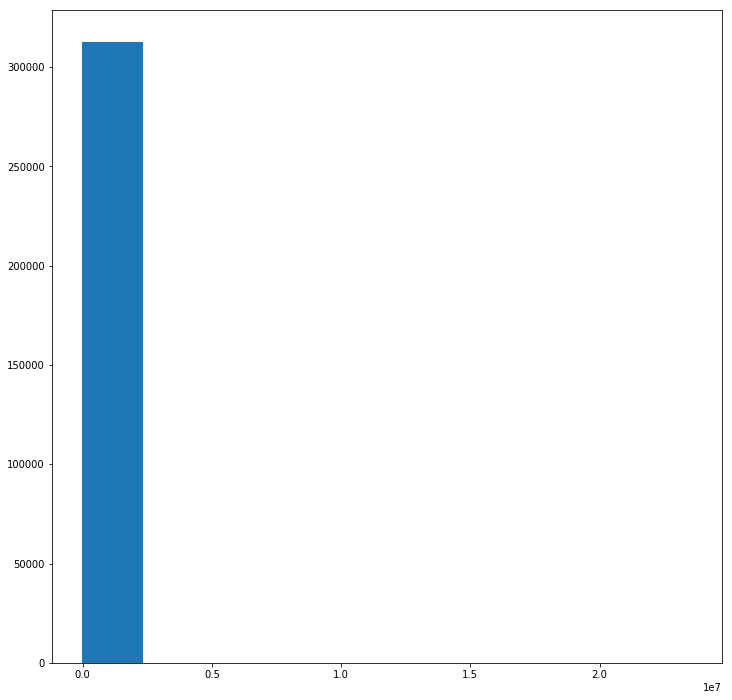

In [4]:
fig = plt.figure(figsize=(12,12))
(n, bins, patches) = plt.hist(df.fuel_cost)

In [5]:
df.fuel_cost.quantile(.99)

2551.6

## Since fuel_cost is so skewed, separate anomolous values for now

In [6]:
df_2 = df[(df.fuel_cost <= df.fuel_cost.quantile(.99)) & (df.fuel_cost >0)]
df_large = df[df.fuel_cost > df.fuel_cost.quantile(.99)]
df_neg = df[df.fuel_cost <0]

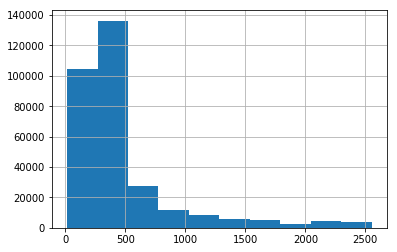

In [7]:
df_2.fuel_cost.hist()

In [10]:
df_neg.fuel_group.value_counts()

Natural Gas    6
Name: fuel_group, dtype: int64

In [11]:
df_2.head()

,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_county,coalmine_msha_id,coalmine_name,coalmine_state,coalmine_type,contract_expiration_date,contract_type,energy_source,fuel_cost,fuel_group,moisture_content,month,natural_gas_delivery_contract_type,natural_gas_supply_contract_type,natural_gas_transportation_service,operator_id,operator_name,plant_id,plant_name,plant_state,primary_transportation_mode,purchase_type,quantity,regulated,reporting_frequency,secondary_transportation_mode,supplier,year
0,5.4,23.100,NaN,0.49,NaN,IMP,NaN,MINA PRIBBENOW,CL,SU,408,C,BIT,213.5,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,RV,NaN,259412,REG,M,NaN,INTEROCEAN COAL,2008
1,5.7,22.800,NaN,0.48,NaN,IMP,NaN,MINA PRIBBENOW,CL,SU,408,C,BIT,211.5,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,RV,NaN,52241,REG,M,NaN,INTEROCEAN COAL,2008
2,0.0,1.039,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NG,863.1,Natural Gas,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,PL,NaN,2783619,REG,M,NaN,BAY GAS PIPELINE,2008
3,14.7,24.610,NaN,1.69,NaN,007,NaN,ALABAMA COAL,AL,SU,1215,C,BIT,277.6,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,7,Gadsden,AL,TR,NaN,25397,REG,A,NaN,ALABAMA COAL,2008
4,15.5,24.446,NaN,0.84,NaN,145,NaN,flat rock #2,AL,S,1108,S,BIT,338.1,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,7,Gadsden,AL,TR,NaN,764,REG,A,NaN,D & E MINING,2008


In [8]:
df_large.contract_type.value_counts()

S     1236
C      612
NC       8
Name: contract_type, dtype: int64

## Remove coal/gas related fields for now

In [9]:
fields = ["contract_type", "energy_source", "fuel_group", "plant_state", "plant_id", "operator_id", "quantity", "regulated", "reporting_frequency", "supplier", "year", "month"]


In [10]:
df[fields].head()

,contract_type,energy_source,fuel_group,plant_state,plant_id,operator_id,quantity,regulated,reporting_frequency,supplier,year,month
0,C,BIT,Coal,AL,3,195.0,259412,REG,M,INTEROCEAN COAL,2008,1
1,C,BIT,Coal,AL,3,195.0,52241,REG,M,INTEROCEAN COAL,2008,1
2,C,NG,Natural Gas,AL,3,195.0,2783619,REG,M,BAY GAS PIPELINE,2008,1
3,C,BIT,Coal,AL,7,195.0,25397,REG,A,ALABAMA COAL,2008,1
4,S,BIT,Coal,AL,7,195.0,764,REG,A,D & E MINING,2008,1


In [6]:
df["year_month"] = df.apply(lambda x: str(x["year"]) + "-" + str(x["month"]), axis=1)

In [17]:
df_temp = df[(df["fuel_cost"] <100000) & (df["fuel_group"] == "Coal") & (df["contract_type"] == "C")].copy()

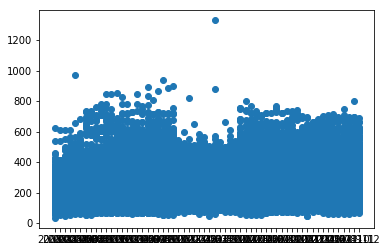

In [18]:
plt.scatter(df_temp["year_month"], df_temp["fuel_cost"])

## Dummy categorical fields

In [50]:
cat_fields = ["contract_type", "energy_source", "plant_state", "regulated", "reporting_frequency", "year", "month"]
non_cat_fields = ["fuel_cost", "quantity"]
temp1 = df[non_cat_fields].reset_index()
temp2 = pd.get_dummies(df[cat_fields]).reset_index()
df_3 = temp1.merge(temp2, on="index").set_index("index")


# Dealing with NAs

In [69]:
df_3.isna().sum()

fuel_cost                  65168
quantity                       0
year                           0
month                          0
contract_type_C                0
contract_type_NC               0
contract_type_S                0
energy_source_BFG              0
energy_source_BIT              0
energy_source_DFO              0
energy_source_JF               0
energy_source_KER              0
energy_source_LIG              0
energy_source_NG               0
energy_source_OG               0
energy_source_PC               0
energy_source_PG               0
energy_source_RFO              0
energy_source_SC               0
energy_source_SGP              0
energy_source_SUB              0
energy_source_WC               0
energy_source_WO               0
plant_state_AK                 0
plant_state_AL                 0
plant_state_AR                 0
plant_state_AZ                 0
plant_state_CA                 0
plant_state_CO                 0
plant_state_CT                 0
          

In [70]:
df_4 = df_3[df_3["fuel_cost"].notna()].copy()

## Check correlations

In [71]:
fig = plt.figure(figsize=(12,12))
corr = df_4.corr()

<Figure size 864x864 with 0 Axes>

### Since correlation map is too large with the dummied variables, loop through the largest correlations manually

In [72]:
corrs = []
for col in corr.columns:
    top_3 = corr[col].sort_values(ascending=False)[1:6]        
    for val in top_3.index:
        corrs.append([col, val, top_3[val]])

corrs = sorted(corrs, key=lambda x: x[2], reverse=True)
corrs[0:20]                      

[['energy_source_RFO', 'plant_state_HI', 0.616654748532155],
 ['plant_state_ND', 'energy_source_LIG', 0.5587863157118816],
 ['plant_state_CA', 'reporting_frequency_A', 0.4202441595462171],
 ['contract_type_S', 'energy_source_NG', 0.3332026188549634],
 ['contract_type_S', 'reporting_frequency_A', 0.3107760931159799],
 ['plant_state_CA', 'energy_source_NG', 0.2996709732773863],
 ['contract_type_S', 'plant_state_CA', 0.2814514160628784],
 ['plant_state_CA', 'contract_type_S', 0.2814514160628784],
 ['contract_type_C', 'energy_source_BIT', 0.2663866710592053],
 ['energy_source_SUB', 'plant_state_MO', 0.22840643019409754],
 ['quantity', 'plant_state_FL', 0.2276097146918606],
 ['quantity', 'energy_source_NG', 0.21207165122057536],
 ['year', 'reporting_frequency_M', 0.19114674075306043],
 ['plant_state_AK', 'energy_source_JF', 0.1878815153121501],
 ['energy_source_SUB', 'plant_state_IA', 0.17327882747748155],
 ['energy_source_SUB', 'plant_state_MI', 0.15736165098486696],
 ['energy_source_SUB',

Some insights here. Certain states are associated with certain energy sources (ND with lignite coal, Hawaii with Residual Fuel Oil). But no sign of fuel costs in the top values. 

Let's see if fuel_cost is associated with anything.

In [73]:
corrs = []
for col in corr.columns:
    top_3 = corr[col].sort_values(ascending=False)[1:]       
    for val in top_3.index:
        if col == "fuel_cost" or val == "fuel_cost":
            corrs.append([col, val, top_3[val]])

corrs = sorted(corrs, key=lambda x: x[2], reverse=True)
corrs[0:20]  

[['fuel_cost', 'plant_state_AZ', 0.020812096771379147],
 ['fuel_cost', 'plant_state_VA', 0.012556165520502276],
 ['fuel_cost', 'energy_source_NG', 0.009384091081745597],
 ['fuel_cost', 'month', 0.003892014966156782],
 ['fuel_cost', 'energy_source_DFO', 0.0038530084405234565],
 ['fuel_cost', 'plant_state_MO', 0.003592968000099606],
 ['fuel_cost', 'year', 0.003546989016163334],
 ['fuel_cost', 'reporting_frequency_M', 0.002351770168980527],
 ['fuel_cost', 'plant_state_NV', 0.0014243503064728328],
 ['fuel_cost', 'plant_state_CO', 0.0014179837707276647],
 ['fuel_cost', 'plant_state_AR', 0.0012964131367043396],
 ['fuel_cost', 'plant_state_HI', 0.0008807020278882378],
 ['fuel_cost', 'plant_state_LA', 0.0008028645369064019],
 ['fuel_cost', 'energy_source_RFO', 0.0004625162983428249],
 ['fuel_cost', 'energy_source_KER', 0.00039111123715222204],
 ['fuel_cost', 'energy_source_JF', 0.0002933778777547932],
 ['fuel_cost', 'energy_source_PG', 0.00021430013806545436],
 ['fuel_cost', 'plant_state_IL', 

Some associations but the values are so low as to be inconclusive. May need some modeling.

# Modelling the Data

In [81]:
def model_summary(model, X, y, columns=[]):
	"""
	Takes a sklearn model and outputs basic stats,
	based on input features (X) and target (y)
	"""
	import pandas as pd
	from scipy import stats
	import numpy as np
	lm = model
	params = np.append(lm.intercept_,lm.coef_)
	predictions = lm.predict(X)
	
	def r_adjusted(r_squared, X, y):
		""" 
		Outputs the R^2 adjusted value for a sklearn linear regression model
		based on r_squared and the X and y of the data sets being used
		"""
		return 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
		
	r_squared = model.score(X, y)
	
	#from sklearn.feature_selection import f_regression
	#f_values, p_values = f_regression(X, y) # for each coefficient
	
	print("R^2: %s" % r_squared)
	print("R^2 Adjusted: %s" % r_adjusted(r_squared, X, y))
	if hasattr(model, "aic"): print("AIC: %s" % model.aic)
	if hasattr(model, "bic"): print("BIC: %s" % model.bic)
	
	newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
	MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

	# Note if you don't want to use a DataFrame replace the two lines above with
	# newX = np.append(np.ones((len(X),1)), X, axis=1)
	# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

	var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
	sd_b = np.sqrt(var_b)
	ts_b = params/ sd_b

	p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

	sd_b = np.round(sd_b,3)
	ts_b = np.round(ts_b,3)
	p_values = np.round(p_values,3)
	params = np.round(params,4)

	myDF3 = pd.DataFrame()
	myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
	if any(columns): myDF3.index = ["Intercept"] + list(columns)
	print(myDF3)

In [79]:
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier(random_state=0) 




In [98]:
df_4.columns

Index(['fuel_cost', 'quantity', 'year', 'month', 'contract_type_C',
       'contract_type_NC', 'contract_type_S', 'energy_source_BFG',
       'energy_source_BIT', 'energy_source_DFO', 'energy_source_JF',
       'energy_source_KER', 'energy_source_LIG', 'energy_source_NG',
       'energy_source_OG', 'energy_source_PC', 'energy_source_PG',
       'energy_source_RFO', 'energy_source_SC', 'energy_source_SGP',
       'energy_source_SUB', 'energy_source_WC', 'energy_source_WO',
       'plant_state_AK', 'plant_state_AL', 'plant_state_AR', 'plant_state_AZ',
       'plant_state_CA', 'plant_state_CO', 'plant_state_CT', 'plant_state_DC',
       'plant_state_DE', 'plant_state_FL', 'plant_state_GA', 'plant_state_HI',
       'plant_state_IA', 'plant_state_ID', 'plant_state_IL', 'plant_state_IN',
       'plant_state_KS', 'plant_state_KY', 'plant_state_LA', 'plant_state_MA',
       'plant_state_MD', 'plant_state_ME', 'plant_state_MI', 'plant_state_MN',
       'plant_state_MO', 'plant_state_MS', 'plant

In [102]:
df_5 = df_4[df_4["contract_type_S"] == 0].copy()
#X = df_4.drop(columns="fuel_cost")
X = df_5[["year", "month", "quantity", "contract_type_C", "contract_type_NC", "contract_type_S",'energy_source_BFG',
       'energy_source_BIT', 'energy_source_DFO', 'energy_source_JF',
       'energy_source_KER', 'energy_source_LIG', 'energy_source_NG',
       'energy_source_OG', 'energy_source_PC', 'energy_source_PG',
       'energy_source_RFO', 'energy_source_SC', 'energy_source_SGP',
       'energy_source_SUB', 'energy_source_WC', 'energy_source_WO',]]
y = df_5["fuel_cost"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [106]:
model = LinearRegression()
results = model.fit(X_train, y_train)
model_summary(model, X_train, y_train, columns=X.columns)

R^2: 0.00019891386562553848
R^2 Adjusted: 7.581528380773417e-05
                   Coefficients  Standard Errors  t values  Probabilites
Intercept            78714.5529              NaN       NaN           NaN
year                   -38.7004              NaN       NaN           NaN
month                   88.5941              NaN       NaN           NaN
quantity                -0.0007              NaN       NaN           NaN
contract_type_C       -363.2899              NaN       NaN           NaN
contract_type_NC      -688.8169              NaN       NaN           NaN
contract_type_S          0.0000              NaN       NaN           NaN
energy_source_BFG        0.0000              NaN       NaN           NaN
energy_source_BIT     -893.5175              NaN       NaN           NaN
energy_source_DFO      590.8370              NaN       NaN           NaN
energy_source_JF      1241.1523              NaN       NaN           NaN
energy_source_KER     1458.4226              NaN       NaN  

In [84]:
from statsmodels.regression.linear_model import OLS

In [103]:
model = OLS(y_train,X_train)
results = model.fit()

In [104]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fuel_cost   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.871
Date:                Wed, 17 Jul 2019   Prob (F-statistic):             0.0120
Time:                        14:41:19   Log-Likelihood:            -2.2590e+06
No. Observations:              178706   AIC:                         4.518e+06
Df Residuals:                  178686   BIC:                         4.518e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
year                -38.7004     91.804     -0.422      0.673    -218.633     141.233
month                88.5941     51.482      1.721      0.085     -12.309     189.497
quantity             -0.0007      0.000     -2.345      0.019      -0.001      -0.000
contract_type_C    -363.2899    615.282     -0.590      0.555   -1569.228     842.648
contract_type_NC   -688.8169   2517.645     -0.274      0.784   -5623.344    4245.710
contract_type_S    6.698e-10   1.57e-09      0.426      0.670   -2.41e-09    3.75e-09
energy_source_BFG -1.051e-09   2.47e-09     -0.426      0.670   -5.88e-09    3.78e-09
energy_source_BIT  7.782e+04   1.85e+05      0.421      0.674   -2.85e+05     4.4e+05
energy_source_DFO  7.931e+04   1.85e+05      0.429      0.668   -2.83e+05    4.42e+05
energy_source_JF   7.996e+04   1.86e+05      0.430      0.667   -2.85e+05    4.45e+05
energy_source_KER  8.017e+04   1.85e+05      0.433      0.665   -2.83e+05    4.43e+05
energy_source_LIG  7.784e+04   1.85e+05      0.421      0.674   -2.85e+05    4.41e+05
energy_source_NG   7.988e+04   1.85e+05      0.432      0.666   -2.83e+05    4.43e+05
energy_source_OG    7.81e+04   1.85e+05      0.422      0.673   -2.85e+05    4.41e+05
energy_source_PC   7.772e+04   1.85e+05      0.420      0.675   -2.85e+05     4.4e+05
energy_source_PG   7.922e+04   1.85e+05      0.428      0.669   -2.84e+05    4.42e+05
energy_source_RFO  7.896e+04   1.85e+05      0.427      0.670   -2.84e+05    4.42e+05
energy_source_SC   7.769e+04   1.86e+05      0.417      0.676   -2.87e+05    4.42e+05
energy_source_SGP  8.022e+04   1.86e+05      0.431      0.667   -2.85e+05    4.45e+05
energy_source_SUB  7.774e+04   1.85e+05      0.420      0.674   -2.85e+05     4.4e+05
energy_source_WC   7.768e+04   1.85e+05      0.420      0.675   -2.85e+05     4.4e+05
energy_source_WO   7.842e+04   1.85e+05      0.424      0.672   -2.84e+05    4.41e+05
==============================================================================
Omnibus:                   903048.407   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   27934951473743.145
Skew:                         224.262   Prob(JB):                         0.00
Kurtosis:                   61251.911   Cond. No.                     3.67e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Wow that model is terrible.

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
model = RandomForestRegressor()
y_pred = model.fit(X_train, y_train).predict(X_test)

/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
mean_squared_error(y_test, y_pred)

6066856776.021499

In [92]:
y_train_pred = model.fit(X_train, y_train).predict(X_train)
mean_squared_error(y_train, y_train_pred)

791339913.4425234